## Modelos estatísticos

O objetivo deste último encontro é mostrar as funcionalidades básicas do python para modelagem estatística. O modulo `statsmodels` implementa uma série de modelos estatísticos entre eles: regressão linear, modelos lineares generalizados (GLM), equações de estimação generalizadas (GEE), regressão robusta, modelos mistos. Além disso, o modulo ainda conta com uma rica classe de modelos para séries temporais e análise de sobrevivência, mais detalhes (http://www.statsmodels.org). 

Neste encontro eu vou focar apenas nos modelos básicos, ou seja, modelos de regressão e modelos lineares generalizados. Devido ao meu particular interesse em GEE vou mostrar algumas funcionalidades do python para modelar dados longitudinais.

Uma parte importante para nos usuários de `R` é que o modelo `statsmodels` incorporou o esquema de `formula` tradicional do `R` para especificar os modelos. Assim, a declaração do preditor linear é muito natural para usuários `R`. Outro aspecto importante é que o `statsmodels` reconhece objetos `pandas data frame` o que facilita muito a entrada e manipulação da base de dados em python. 

### Regressão linear múltipla

Vamos começar importando alguns modulos. 

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/wagner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


O modulo `statsmodels` já traz alguns conjuntos de dados para serem usados na documentação. Assim, para começar vou usar um destes conjuntos de dados. 

#### Carregando a base de dados

In [2]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


#### Ajustando o modelo de regressão linear e resumindo o ajuste

In [3]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 26 Jan 2018   Prob (F-statistic):           1.90e-08
Time:                        11:43:56   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

Este foi a forma mais simples e direta de ajustar um modelo de regressão em python.

### Regressão linear: dados simulados

Vamos ver como ajustar o modelo passo-a-passo usando um conjunto de dados simulados.
Vamos impor alguns modulos e setar a semente para a nossa simulação ser reproduzível.


In [4]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

Próximo passo vamos simular do modelo de regressão.

In [5]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Ajuste via minímos quadrados ordinários e resumindo o ajuste.

In [6]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Fri, 26 Jan 2018   Prob (F-statistic):          2.83e-239
Time:                        11:43:56   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

Extraindo algumas quantidades de interesse.

In [7]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [  1.34233516  -0.04024948  10.01025357]
R2:  0.999987936503


## Ajuste de curvas via OLS

In [8]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

mu = np.dot(X, beta)
y = mu + sig * np.random.normal(size=nsample)

Ajustando o modelo e resumindo o ajuste.

In [9]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 26 Jan 2018   Prob (F-statistic):           6.30e-27
Time:                        11:43:56   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

Novamente extraindo quantidades de interesse.

In [10]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [ 0.02640602  0.10380518  0.00231847  0.17121765]
Predicted values:  [  4.77072516   5.22213464   5.63620761   5.98658823   6.25643234
   6.44117491   6.54928009   6.60085051   6.62432454   6.6518039
   6.71377946   6.83412169   7.02615877   7.29048685   7.61487206
   7.97626054   8.34456611   8.68761335   8.97642389   9.18997755
   9.31866582   9.36587056   9.34740836   9.28893189   9.22171529
   9.17751587   9.1833565    9.25708583   9.40444579   9.61812821
   9.87897556  10.15912843  10.42660281  10.65054491  10.8063004
  10.87946503  10.86825119  10.78378163  10.64826203  10.49133265
  10.34519853  10.23933827  10.19566084  10.22490593  10.32487947
  10.48081414  10.66779556  10.85485568  11.01006072  11.10575781]


Podemos plotar um diagrama de dispersão com a curva ajustada para visualizar o ajuste.

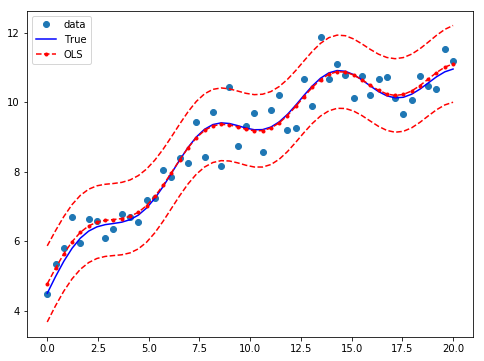

In [11]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, mu, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## Modelos Lineares Generalizados

### Regressão logística

Para este exemplo vamos usar um conjunto de dados do livro Jeff Gill (2000) Generalized linear models: A unified approach. Podemos ver uma descrição geral do conjunto de dados.

In [12]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

Vamos agora carregar o conjunto de dados que está disponível no modulo `statsmodel`. 
Neste caso o objeto carregado já é um `statsmodels.dataset` objeto e portanto, já tem alguns atributos importantes. Ao construir tal objeto o usuário já deve definir quais são as covariáveis ou *exogenous variables* na nomenclatura usada pelo modulo. Além disso, neste caso como é um modelo de regressão binomial a variável resposta tem duas colunas, número de sucessos e número de fracassos. 

In [13]:
data = sm.datasets.star98.load()
print(data.exog_name)
print(data.endog_name)

['LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP', 'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF', 'PCTCHRT', 'PCTYRRND', 'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL', 'AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF', 'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF']
['NABOVE', 'NBELOW']


Primeiro instanciamos (não sei se isso existe em pt) o modelo. Veja que o primeiro argumento são as variáveis endogeneas, ou seja, a resposta. O segundo argumento são as variávies exogenas (covariáveis). Após isso, selecionamos a família que neste caso é Binomial. 

In [14]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())

Ajustamos o modelo e resumimos o ajuste.

In [15]:
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      283
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3000.5
Date:                Fri, 26 Jan 2018   Deviance:                       4082.4
Time:                        11:43:57   Pearson chi2:                     9.50
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0169      0.000    -39.491      0.000      -0.018      -0.016
x2             0.0101      0.001     16.832      0.0

Alguns gráficos para explorar o ajuste.

In [16]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

O modulo `statsmodels` tem vários sub modulos um deles é para fazer gráficos de resíduos. Veja o código abaixo.

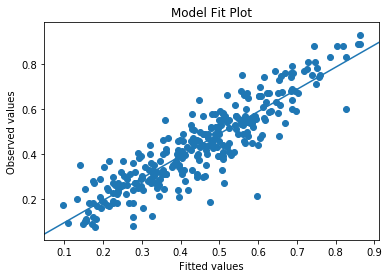

In [17]:
from statsmodels.graphics.api import abline_plot
from scipy import stats

means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:,0], 25)
means75 = means.copy()
means75[0] = lowinc_75per = stats.scoreatpercentile(data.exog[:,0], 75)
resp_25 = res.predict(means25)
resp_75 = res.predict(means75)
diff = resp_75 - resp_25

fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Gráficos de resíduos de Pearson versus fitted values.

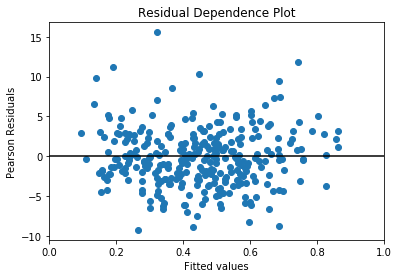

In [18]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

Historgrama dos resíduos deviance.

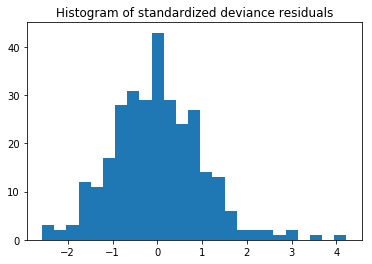

In [19]:
fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

QQ-plot.

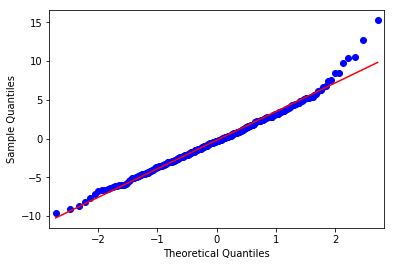

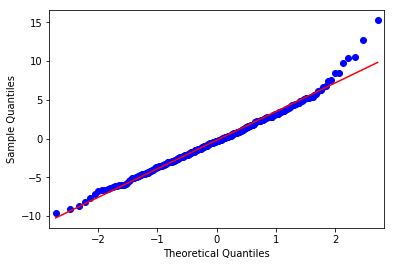

In [20]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

### Regressão Poisson e Binomial negativo

Para terminar esse encontro vamos reanalisar os dados do capulho usando modelo de regressão Poisson e binomial negativo. Primeiro vamos carregar o modulo `pandas` para ler a base de dados conforme o Walmes explicou nos últimos dois encontros.

In [21]:
import pandas as pd
cap = pd.read_table('http://leg.ufpr.br/~walmes/data/desfolha.txt')
cap.dtypes

estag      object
desf        int64
rep         int64
pcapu     float64
nnos        int64
alt       float64
ncapu       int64
nestru      int64
dtype: object

Neste caso a resposta é o número de capulhos coluna `ncapu` e como covariáveis temos: estágio fenológico (`estag`) e nível de desfolha (`desf`). Seguinte o nosso artigo, foram ajustados alguns modelos encaixados são eles:
  - Model 1: ncapu ~ 1;
  - Model 2: ncapu ~ desf + I(desf^2);
  - Model 3: ncapu ~ est:desf + I(desf^2);
  - Model 4: ncapu ~ est:(desf + I(desf^2)).

Como o `statsmodels` suporta `formula` igual ao `R` podemos ajustar exatamente os mesmos modelos.

In [22]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Poisson models
mod1 = smf.glm('ncapu ~ 1', data = cap,family=sm.families.Poisson()).fit()
mod2 = smf.glm('ncapu ~ desf + I(desf^2)', data = cap,family=sm.families.Poisson()).fit()
mod3 = smf.glm('ncapu ~ estag:desf + I(desf^2)', data = cap,family=sm.families.Poisson()).fit()
mod4 = smf.glm('ncapu ~ estag:(desf + I(desf^2))', data = cap,family=sm.families.Poisson()).fit()
print([mod1.aic, mod2.aic, mod3.aic, mod4.aic])

mod3.summary2()

[561.86550682343068, 548.24645861002, 530.939348753133, 532.87273473510959]


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:                GLM              AIC:            530.9393 
Link Function:        log              BIC:            -537.1531
Dependent Variable:   ncapu            Log-Likelihood: -258.47  
Date:                 2018-01-26 11:43 LL-Null:        -279.93  
No. Observations:     125              Deviance:       32.588   
Df Model:             6                Pearson chi2:   32.6     
Df Residuals:         118              Scale:          1.0000   
Method:               IRLS                                      
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
Intercept          2.2690   0.0582 38.9845 0.0000  2.1549 2.3831
estag[1veg]:desf   0.0218   0.0174  1.2544 0.2097 -0.0123 0.0558
estag[2bot]:desf   0.0229   0.0174  1.3161 0.1881 -0.0112 0.0569
estag[3flor]:desf  0.0169   0.0174  0.9747 0.3297 -0.0171 0.0509
estagaca]:desf  0.0173   0.0174  0.9960 0.3193 -0.0167 0.0513
estag[5capu]:desf  0.0239   0.0174  1.3763 0.1687 -0.0101 0.0580
I(desf ^ 2)       -0.0251   0.0177 -1.4178 0.1562 -0.0598 0.0096
================================================================

"""

Ajustando o modelo binomial negativo.

In [23]:
# Negative binomial models
mod1 = smf.glm('ncapu ~ 1', data = cap,family=sm.families.NegativeBinomial()).fit()
mod2 = smf.glm('ncapu ~ desf + I(desf^2)', data = cap,family=sm.families.NegativeBinomial()).fit()
mod3 = smf.glm('ncapu ~ estag:desf + I(desf^2)', data = cap,family=sm.families.NegativeBinomial()).fit()
mod4 = smf.glm('ncapu ~ estag:(desf + I(desf^2))', data = cap,family=sm.families.NegativeBinomial()).fit()
print([mod1.aic, mod2.aic, mod3.aic, mod4.aic])

mod3.summary2()

[781.63522755954864, 783.55894916741647, 788.12151683196714, 795.32654572058107]


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:               GLM               AIC:             788.1215 
Link Function:       log               BIC:             -565.7628
Dependent Variable:  ncapu             Log-Likelihood:  -387.06  
Date:                2018-01-26 11:43  LL-Null:         -389.82  
No. Observations:    125               Deviance:        3.9782   
Df Model:            6                 Pearson chi2:    3.91     
Df Residuals:        118               Scale:           0.033136 
Method:              IRLS                                        
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          2.2793   0.0319 71.3848 0.0000  2.2167  2.3419
estag[1veg]:desf   0.0273   0.0092  2.9822 0.0029  0.0094  0.0453
estag[2bot]:desf   0.0284   0.0092  3.1057 0.0019  0.0105  0.0464
estag[3flor]:desf  0.0228   0.0092  2.4930 0.0127  0.0049  0.0408
estagaca]:desf  0.0224   0.0092  2.4444 0.0145  0.0044  0.0403
estag[5capu]:desf  0.0296   0.0092  3.2314 0.0012  0.0116  0.0476
I(desf ^ 2)       -0.0308   0.0093 -3.3191 0.0009 -0.0490 -0.0126
=================================================================

"""